<a href="https://colab.research.google.com/github/Rob685/coolstarsucsd/blob/master/des_gaia_sm_colormaps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.colors import LogNorm
from astropy.table import Table

from google.colab import drive #to import my own module, I must first follow this procedure:
drive.mount('/content/gdrive')

import sys
sys.path.append('/content/gdrive/My Drive/Colab Notebooks')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
plt.rcParams['figure.facecolor'] = 'white'
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=15)
plt.rc('axes', linewidth=2.5) # change back to 1.5
plt.rc('axes', labelsize=15) # change back to 10
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('legend', fontsize=15) # change back to 7

In [ ]:
! sudo apt-get install texlive-latex-recommended #1
#! sudo apt-get install dvipng texlive-fonts-recommended #2
! sudo apt-get install cm-super
! sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended 
! wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip #3
! unzip type1cm.zip -d /tmp/type1cm #4
! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins  #5
! sudo mkdir /usr/share/texmf/tex/latex/type1cm #6
! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm #7
! sudo texhash #8

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lmodern fonts-noto-mono libcupsfilters1
  libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0 libkpathsea6
  libpotrace0 libptexenc1 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13
  lmodern poppler-data t1utils tex-common texlive-base texlive-binaries
  texlive-latex-base
Suggested packages:
  fonts-noto poppler-utils ghostscript fonts-japanese-mincho
  | fonts-ipafont-mincho fonts-japanese-gothic | fonts-ipafont-gothic
  fonts-arphic-ukai fonts-arphic-uming fonts-nanum debhelper gv
  | postscript-viewer perl-tk xpdf-reader | pdf-viewer texlive-latex-base-doc
  texlive-latex-recommended-doc texlive-pstricks
The following NEW packages will be installed:
  fonts-d

In [ ]:
path_des = 'gdrive/My Drive/Colab Notebooks/des_workspace/des_dered_data/'

In [ ]:
des_df = pd.read_csv(path_des+'des_merged_rob_cuts.csv.gz',compression='gzip',low_memory=False)
des = Table.from_pandas(des_df)

In [ ]:
len(des)

227257

In [ ]:
des_gaia_df = des_df.dropna(subset=['source_id'])
des_gaia = Table.from_pandas(des_gaia_df)
len(des_gaia)

78220

In [ ]:
x1 = des['IMAG_DERED'] # i mag des
x2 = des['IMAG_DERED'] - des['ZMAG_DERED'] # i - z des

y1 = des_gaia['IMAG_DERED'] # i mag gaiaXdes
y2 = des_gaia['IMAG_DERED'] - des_gaia['ZMAG_DERED'] # i - z gaiaXdes

p1 = np.array([x1])# des
q1 = np.array([x2])

p2 = np.array([y1]) # gaia
q2 = np.array([y2])

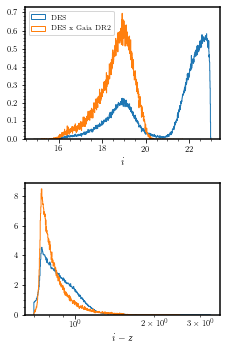

In [ ]:
fig = plt.figure(1,figsize=(1*3.4, 2*3.4*3/4.))

ax1 = plt.subplot(2,1,1)
plt.hist(x1,histtype='step',bins=1000,label='DES',density=True)
plt.hist(y1,histtype='step',bins=1000,label='DES x Gaia DR2',density=True)
plt.xlabel('$i$')
plt.legend(loc='upper left')
plt.minorticks_on()

ax2 = plt.subplot(2,1,2)
plt.hist(x2,histtype='step',bins=1000,label='DES',density=True)
plt.hist(y2,histtype='step',bins=1000,label='DES x Gaia DR2',density=True)
plt.xlabel('$i - z$')
plt.xscale('log')
plt.minorticks_on()

plt.tight_layout()
plt.show()

## Chris' Code:

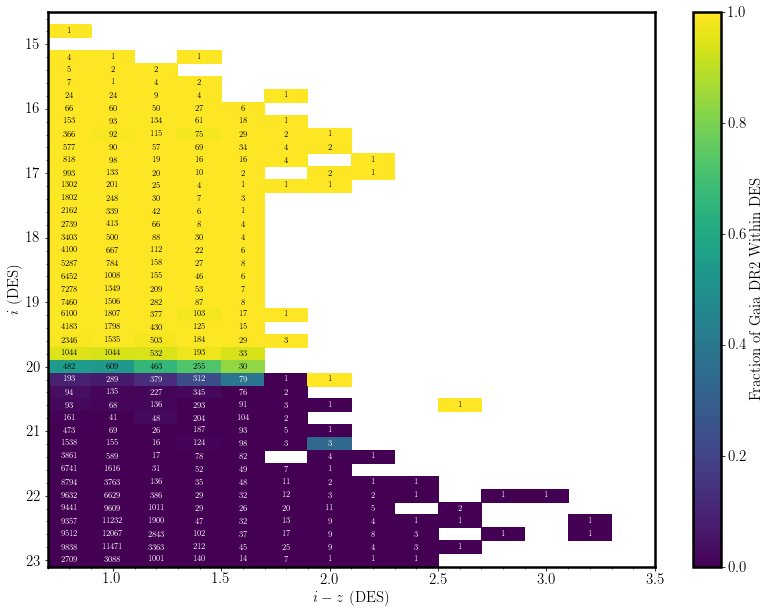

In [ ]:
#Plot
fig = plt.figure(1,figsize=(4*3.4, 4*3.4*3/4.))
ax = fig.add_subplot(111)

#Defining the intervals for i-mag and i - k
step1, step2 = 0.2, 0.2
COLOR = np.arange(0.7, 3.5+step1, step1)
MAG   = np.arange(14.5, 23+step2, step2)

VALUE = np.zeros((len(MAG), len(COLOR)))

Mask1 = np.zeros((len(MAG), len(COLOR)))

Percent1 = []
Percent2 = []
NumberT  = []

for i in range(len(COLOR)):
	for j in range(len(MAG)):
		len2 = len(des_gaia[np.where( (y2 > COLOR[i]) & 
			                    (y2 <= COLOR[i]+step1) &
			                    (y1 > MAG[j]) & (y1 <= MAG[j]+step2) ) ] )
		len1 = len(des[np.where( (x2 > COLOR[i]) & 
			                         (x2 <= COLOR[i]+step1) &
			                         (x1 > MAG[j]) & (x1 <= MAG[j]+step2) ) ] )

		if len1 == 0:
			VALUE[j][i] = np.nan
			Mask1[j][i] = 1
		else:
			VALUE[j][i] = float(len2) / float(len1)
			if MAG[j] <= 20: 
				Percent1.append(float(len2) / float(len1))
				NumberT.append(len1)
			if MAG[j] > 20: 
				Percent2.append(float(len2) / float(len1))

			#print(COLOR[i], MAG[j], len1, float(len2) / float(len1))

			if float(len2) / float(len1) < 0.5: plt.text(COLOR[i]+step1/2., MAG[j]+step2/2., '%s'%len1, ha='center', va='center', fontsize=8, color='w')
			else: plt.text(COLOR[i]+step1/2., MAG[j]+step2/2., '%s'%len1, ha='center', va='center', fontsize=8, color='k')

VALUE2 = np.ma.array(VALUE, mask=Mask1)

#Plotting the pcolormesh
cax = ax.pcolormesh(COLOR, MAG, VALUE2, alpha=1.0, 
                    #cmap='gist_ncar'
                    )
plt.axis('tight')

#ymin, ymax = plt.ylim()
#xmin, xmax = plt.xlim()

ax.minorticks_on()

#ax.set_ylim(ymin,18)
#ax.set_xlim(xmin,3.2)
cbar = plt.colorbar(cax)
cbar.set_label('Fraction of Gaia DR2 Within DES')
cbar.solids.set_rasterized(True)
#cbar.set_clim(vmin = 0.937, vmax = 1.0)#This calibrates the colorbar color map range.


ax.set_xlabel(r'$i - z$ (DES)')
ax.set_ylabel(r'$i$ (DES)')
plt.gca().invert_yaxis()
plt.savefig('gdrive/My Drive/Colab Notebooks/figures/des_gaiadr2_completionmap.pdf',dpi = 300,bbox_inches='tight',padding=0)
plt.show()

# DES x SM colormap

In [ ]:
des_sm = pd.read_csv(path_des+'des_smssdr1.csv')
len(des_sm)

126433

In [ ]:
des_sm_df = des_df.merge(des_sm,on='COADD_OBJECT_ID',how='inner',suffixes=('','_dup'))
des_sm_df = des_sm_df.drop(des_sm_df.filter(regex='_dup').columns, axis=1)
des_sm_df.shape

(58621, 269)

In [ ]:
des_sm = Table.from_pandas(des_sm_df)

In [ ]:
x1 = des['IMAG'] # i mag des
x2 = des['IMAG_DERED'] - des['ZMAG_DERED'] # i - z des

y1 = des_sm['IMAG'] # i mag gaiaXdes
y2 = des_sm['IMAG_DERED'] - des_sm['ZMAG_DERED'] # i - z gaiaXdes

p1 = np.array([x1])# des
q1 = np.array([x2])

p2 = np.array([y1]) # gaia
q2 = np.array([y2])

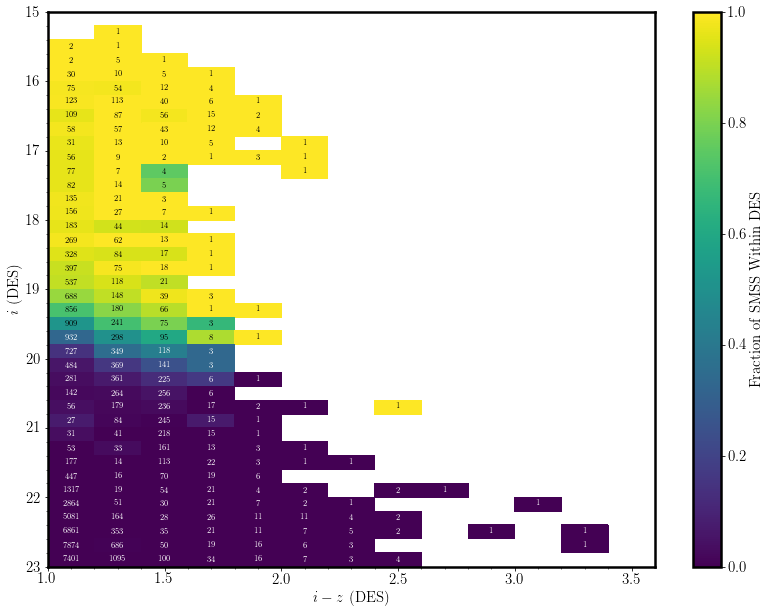

In [ ]:
#Plot
fig = plt.figure(1,figsize=(4*3.4, 4*3.4*3/4.))
ax = fig.add_subplot(111)

#Defining the intervals for i-mag and i - k
step1, step2 = 0.2, 0.2
COLOR = np.arange(1, 3.5+step1, step1)
MAG   = np.arange(15, 23+step2, step2)

VALUE = np.zeros((len(MAG), len(COLOR)))

Mask1 = np.zeros((len(MAG), len(COLOR)))

Percent1 = []
Percent2 = []
NumberT  = []

for i in range(len(COLOR)):
	for j in range(len(MAG)):
		len2 = len(des_sm[np.where( (y2 > COLOR[i]) & 
			                    (y2 <= COLOR[i]+step1) &
			                    (y1 > MAG[j]) & (y1 <= MAG[j]+step2) ) ] )
		len1 = len(des[np.where( (x2 > COLOR[i]) & 
			                         (x2 <= COLOR[i]+step1) &
			                         (x1 > MAG[j]) & (x1 <= MAG[j]+step2) ) ] )

		if len1 == 0:
			VALUE[j][i] = np.nan
			Mask1[j][i] = 1
		else:
			VALUE[j][i] = float(len2) / float(len1)
			if MAG[j] <= 20: 
				Percent1.append(float(len2) / float(len1))
				NumberT.append(len1)
			if MAG[j] > 20: 
				Percent2.append(float(len2) / float(len1))

			#print(COLOR[i], MAG[j], len1, float(len2) / float(len1))

			if float(len2) / float(len1) < 0.5: plt.text(COLOR[i]+step1/2., MAG[j]+step2/2., '%s'%len1, ha='center', va='center', fontsize=8, color='w')
			else: plt.text(COLOR[i]+step1/2., MAG[j]+step2/2., '%s'%len1, ha='center', va='center', fontsize=8, color='k')

VALUE2 = np.ma.array(VALUE, mask=Mask1)

#Plotting the pcolormesh
cax = ax.pcolormesh(COLOR, MAG, VALUE2, alpha=1.0, 
                    #cmap='gist_ncar'
                    )
plt.axis('tight')

#ymin, ymax = plt.ylim()
#xmin, xmax = plt.xlim()

ax.minorticks_on()

#ax.set_ylim(ymin,18)
#ax.set_xlim(xmin,3.2)
cbar = plt.colorbar(cax)
cbar.set_label('Fraction of SMSS Within DES')
cbar.solids.set_rasterized(True)
#cbar.set_clim(vmin = 0.937, vmax = 1.0)#This calibrates the colorbar color map range.


ax.set_xlabel(r'$i - z$ (DES)')
ax.set_ylabel(r'$i$ (DES)')
#ax.set_ylim(15,30)
#ax.set_title(r'i-mag v. i - z')
plt.gca().invert_yaxis()
plt.savefig('gdrive/My Drive/Colab Notebooks/figures/des_smss_completionmap.pdf',dpi = 300,bbox_inches='tight',padding=0)
plt.show()

# SM x Gaia DR 2 Colormap

In [ ]:
sm_path = 'gdrive/My Drive/Colab Notebooks/sm_workspace/'
smss_df = pd.read_csv(sm_path+'smss_merged3.csv.gz',compression='gzip',low_memory=False)
smss = Table.from_pandas(smss_df)

In [ ]:
smss_gaia_df = smss_df.dropna(subset=['source_id'])
smss_gaia = Table.from_pandas(smss_gaia_df)
len(smss_gaia)

32894

In [ ]:
x1 = smss['i_psf'] # i mag sm
x2 = smss['i_psf'] - smss['z_psf'] # i - z sm

y1 = smss_gaia['i_psf'] # i mag sm_gaoa
y2 = smss_gaia['i_psf'] - smss_gaia['z_psf'] # i - z sm_gaia

p1 = np.array([x1])# des
q1 = np.array([x2])

p2 = np.array([y1]) # skymapper
q2 = np.array([y2])

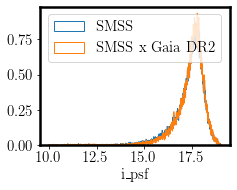

In [ ]:
fig = plt.figure(1,figsize=(1*3.4, 1*3.4*3/4.))
plt.hist(x1,histtype='step',bins=1000,density=True,label='SMSS')
plt.hist(y1,histtype='step',bins=1000,density=True,label='SMSS x Gaia DR2')
plt.xlabel('i\_psf')
plt.legend(loc='upper left')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.


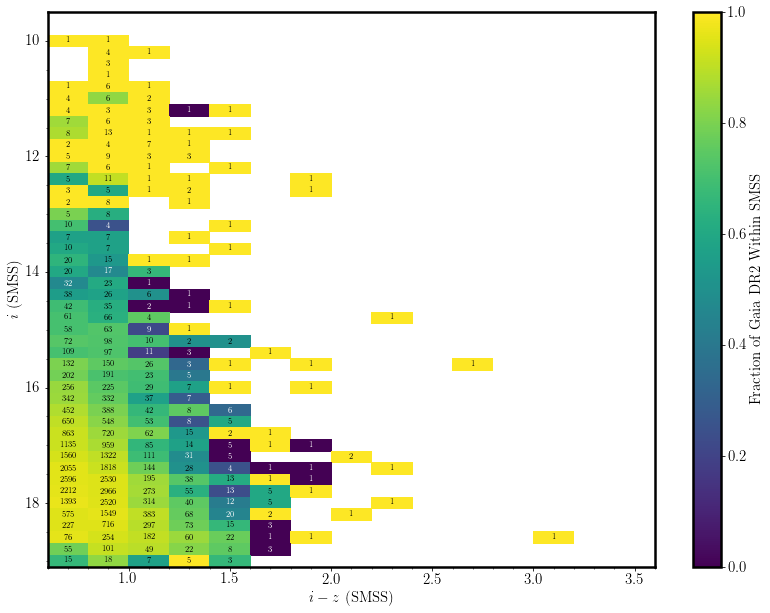

In [ ]:
#Plot
fig = plt.figure(1,figsize=(4*3.4, 4*3.4*3/4.))
ax = fig.add_subplot(111)

#Defining the intervals for i-mag and i - k
step1, step2 = 0.2, 0.2
COLOR = np.arange(0.6, 3.5+step1, step1)
MAG   = np.arange(9.5, 19+step2, step2)

VALUE = np.zeros((len(MAG), len(COLOR)))

Mask1 = np.zeros((len(MAG), len(COLOR)))

Percent1 = []
Percent2 = []
NumberT  = []

for i in range(len(COLOR)):
	for j in range(len(MAG)):
		len2 = len(smss_gaia[np.where( (y2 > COLOR[i]) & 
			                    (y2 <= COLOR[i]+step1) &
			                    (y1 > MAG[j]) & (y1 <= MAG[j]+step2) ) ] )
		len1 = len(smss[np.where( (x2 > COLOR[i]) & 
			                         (x2 <= COLOR[i]+step1) &
			                         (x1 > MAG[j]) & (x1 <= MAG[j]+step2) ) ] )

		if len1 == 0:
			VALUE[j][i] = np.nan
			Mask1[j][i] = 1
		else:
			VALUE[j][i] = float(len2) / float(len1)
			if MAG[j] <= 20: 
				Percent1.append(float(len2) / float(len1))
				NumberT.append(len1)
			if MAG[j] > 20: 
				Percent2.append(float(len2) / float(len1))

			#print(COLOR[i], MAG[j], len1, float(len2) / float(len1))

			if float(len2) / float(len1) < 0.5: plt.text(COLOR[i]+step1/2., MAG[j]+step2/2., '%s'%len1, ha='center', va='center', fontsize=8, color='w')
			else: plt.text(COLOR[i]+step1/2., MAG[j]+step2/2., '%s'%len1, ha='center', va='center', fontsize=8, color='k')

VALUE2 = np.ma.array(VALUE, mask=Mask1)

#Plotting the pcolormesh
cax = ax.pcolormesh(COLOR, MAG, VALUE2, alpha=1.0, 
                    #cmap='gist_ncar'
                    )
plt.axis('tight')

#ymin, ymax = plt.ylim()
#xmin, xmax = plt.xlim()

ax.minorticks_on()

#ax.set_ylim(ymin,18)
#ax.set_xlim(xmin,3.2)
cbar = plt.colorbar(cax)
cbar.set_label('Fraction of Gaia DR2 Within SMSS')
cbar.set_clim(vmin = 0.0, vmax = 1.0)#This calibrates the colorbar color map range.
cbar.solids.set_rasterized(True)


ax.set_xlabel(r'$i - z$ (SMSS)')
ax.set_ylabel(r'$i$ (SMSS)')
#ax.set_ylim(0,24)
#ax.set_title(r'i-mag v. i - z')

plt.gca().invert_yaxis()
plt.savefig('gdrive/My Drive/Colab Notebooks/figures/smss_gaiadr2_completionmap.pdf',dpi = 300,bbox_inches='tight',padding=0)
plt.show()